# Lab 9 - Linear Models - Part 1

In [1]:
%matplotlib inline

This will make all the `matplotlib` images appear in the notebook.

In [2]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

sns.set(style="whitegrid")

## Directions

The Labs also present technical material that augments the lectures and "book".  You should read through the entire lab at the start of each module.

<div style="background: mistyrose; color: firebrick; border: 2px solid darkred; padding: 5px; margin: 10px;">
Please follow the directions and make sure you provide the requested output. Failure to do so may result in a lower grade even if the code is correct or even 0 points.
</div>

### General Instructions

1.  You will be submitting your assignment to Canvas. If there are no accompanying files, you should submit *only* your notebook and it should be named using *only* your JHED id: fsmith79.ipynb for example if your JHED id were "fsmith79". If the assignment requires additional files, you should name the *folder/directory* your JHED id and put all items in that folder/directory, ZIP it up (only ZIP...no other compression), and submit it to Canvas.
    
    * do **not** use absolute paths in your notebooks. All resources should appear in the same directory as the rest of your assignments.
    * the directory **must** be named your JHED id and **only** your JHED id.
    * you don't need to submit course supplied data sets back.
    
2. Data Science is as much about what you write (communicating) as the code you execute (researching). In many places, you will be required to execute code and discuss both the purpose and the result. Additionally, Data Science is about reproducibility and transparency. This includes good communication with your team and possibly with yourself. Therefore, you must show **all** work.

3. Avail yourself of the Markdown/Codecell nature of the notebook. If you don't know about Markdown, look it up. Your notebooks should not look like ransom notes. Don't make everything bold. Clearly indicate what question you are answering.

4. Submit a cleanly executed notebook. The first code cell should say `In [1]` and each successive code cell should increase by 1 throughout the notebook.

In [3]:
def freeman_diaconis(data):
    mn = data.min()
    mx = data.max()
    quartiles = stats.mstats.mquantiles( data, [0.25, 0.5, 0.75])
    iqr = quartiles[2] - quartiles[ 0]
    n = len( data)
    h = 2.0 * (iqr/n**(1.0/3.0))
    return int(np.ceil((mx - mn)/h)), mn, mx

In [4]:
def histogram_w_whiskers(data, variable_name, zoom=None):
    k, mn, mx = freeman_diaconis(data[variable_name])
    bins = np.linspace(mn, mx, num=k)
    print(f"Freeman Diaconis for {variable_name}: {len(bins)} bins")

    observations = len(data)
    empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()
        
    # start the plot: 2 rows, because we want the boxplot on the first row
    # and the hist on the second
    fig, ax = plt.subplots(
        2, figsize=(7, 5), sharex=True,
        gridspec_kw={"height_ratios": (.7, .3)}  # the boxplot gets 30% of the vertical space
    )

    # the histogram
    ax[0].hist(data[variable_name],bins=bins, color="dimgray", weights=empirical_weights)
    ax[0].set_title(f"{variable_name} distribution - Freeman Diaconis")
    ax[0].set_ylabel("Relative Frequency")
    if zoom:
        ax[0].set_ylim((0, zoom))
    # the box plot
    ax[1].boxplot(data[variable_name], vert=False)
    # removing borders
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['left'].set_visible(False)
    ax[1].set_xlabel(variable_name)

    # and we are good to go
    plt.show()
    plt.close()

In [5]:
def histogram_trio(data, variable_name, zoom=1.0):
    k, mn, mx = freeman_diaconis(data[variable_name])
    bins = np.linspace(mn, mx, num=k) #[i for i in range( mn, mx, h)]    
    print(f"Freeman Diaconis for {variable_name}: {len(bins)} bins")

    observations = len(data)
    empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()

    fig, ax = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

    fewer_bins = int(len(bins) * .50)
    more_bins = int(len(bins) * 2)

    n, bins, patches = ax[1].hist(data[variable_name], color="DimGray", bins=bins, weights=empirical_weights) # <---
    ax[1].set_xlabel(variable_name)
    ax[1].set_ylabel("Relative Frequency")
    ax[1].set_title(f"Relative Frequency Histogram of {variable_name}")
    ax[1].set_ylim((0, zoom))
    
    n, bins, patches = ax[0].hist(data[variable_name], color="DimGray", bins=fewer_bins, weights=empirical_weights)
    ax[0].set_xlabel(variable_name)
    ax[0].set_ylabel("Relative Frequency")
    ax[0].set_title(f"Relative Frequency Histogram of {variable_name} (Fewer Bins)")
    
    n, bins, patches = ax[2].hist(data[variable_name], color="DimGray", bins=more_bins, weights=empirical_weights)
    ax[2].set_xlabel(variable_name)
    ax[2].set_ylabel("Relative Frequency")
    ax[2].set_title(f"Relative Frequency Histogram of {variable_name} (More Bins)")

    plt.show()
    plt.close()

In [6]:
def describe_by_category(data, numeric, categorical, transpose=False):
    grouped = data.groupby(categorical)
    grouped_y = grouped[numeric].describe()
    if transpose:
        print(grouped_y.transpose())
    else:
        print(grouped_y)

In [7]:
from io import StringIO

## Data

The data is embedded here. No need to expand...

In [8]:
data = """\
x1	x2	y
42.53196404638552	0	39.266138333852396
37.01869338822434	0	35.38780631996972
48.3288342504206	0	46.26839427599523
43.01575004949211	1	44.16407081382897
49.82446398716534	1	48.14598000061575
53.05182703264607	0	50.10859905332506
50.577508493151335	1	48.72278380277136
48.66230915788665	1	46.86070060854518
59.200905062365756	1	54.54941811007832
46.899458063301296	1	46.45274210737207
49.53984298918534	0	47.311098766248165
56.20141058612436	0	55.009134373799384
46.191555580958024	0	44.694716359010805
51.070050720723486	1	49.76781032110353
41.665398630589856	0	38.56016900570599
47.254803561372825	1	47.48137185203709
37.63542814810546	1	41.28618234911959
51.47620027944755	1	50.453917889264424
41.60356365942902	0	38.56589893639894
53.077076349228655	1	49.84609972107021
52.49443318351219	1	50.070370688536016
53.51311419261094	1	51.4009809241463
45.92157212414309	0	46.4205775847286
43.90918076520862	0	44.06894418027712
50.28483454561473	0	48.307980376536335
47.77619925830439	0	47.52880364365444
46.05021820204064	0	45.266540282947766
54.74022798047512	1	49.5388424862949
54.175224214094904	1	49.5151845038181
33.519830644268666	0	33.14945320232296
51.609721790723185	1	47.56576269423462
49.557159460681596	1	47.33747984021572
59.517414435952645	1	51.63826903998511
39.77114946413516	1	42.0877068737684
57.19934899522586	1	52.077398785763805
49.69281617216099	0	45.833588129119434
53.524435708676414	1	50.068221941368854
50.61217550266046	1	49.50419159136896
53.306928185698126	1	50.75987607045231
43.03399419827299	1	43.9346784831377
43.802996624770685	0	42.61434651785355
51.088668626382216	1	48.40053169030099
44.037250800862424	1	44.15064915784359
55.72802275854175	1	49.8037233570838
49.922045123509555	0	47.58118334256501
50.40048098011718	1	47.28141145097148
48.02305990997677	1	46.10165485947634
51.64897886406086	1	50.287899466343205
45.928392403145025	1	46.52227443544181
47.7724354134946	1	47.51990418399228
47.80675744820208	1	46.73881915577311
47.35650622673358	1	47.72425745581924
47.907224460386324	0	45.73973335962161
45.98488666197187	0	44.801011100197364
56.41638750771391	0	55.414010391595944
50.86072750451391	1	50.572144262538714
48.12141659727555	1	49.3582794938027
55.43357474041848	1	51.613075364234994
51.276189055778445	0	49.966446887747175
41.5308310134472	1	43.341660654023244
53.81960283823004	1	48.997038217219924
51.73245886784904	1	49.68150480169435
38.67507301648082	0	38.48163914717438
52.011730639725364	1	49.79762678660579
53.79425640517957	1	49.80587872843501
47.46820398034373	1	46.005905956051826
42.680463453804926	0	41.757416757527515
47.014256759720936	1	46.336957889424994
53.354670848377815	0	50.45889702027998
49.58224911012258	1	49.0264643905292
38.88899948112294	0	38.464739223067646
56.510437687966835	1	50.93830097342925
50.81551035943704	1	48.920746514983676
53.64809210704751	1	49.623918929738046
47.11904227707985	0	46.27750579448739
44.34006262446135	0	42.05526135508424
51.42389910442588	1	49.54581162077361
49.318543069260116	1	47.10237118335985
53.973145024782724	0	52.29182487678392
45.95441290346115	1	48.074735130237976
53.52428517654122	1	51.16295120339898
46.62065003375652	0	43.30782980680714
44.53656539477583	1	45.01816474475141
41.15207097455226	1	43.89337064084363
49.310167483183044	0	47.131023812095286
39.037085956777666	1	43.96034732721155
46.25776087326585	1	44.75279018173252
49.39331705759021	0	48.52259266585329
57.526508530317884	0	55.46688196486551
51.61158177102028	0	50.17898869276044
49.90659353550422	0	49.07749388172434
42.565669815616296	0	41.705411553444804
41.7964545880127	0	40.31781981336837
51.57540430152188	1	47.44725959006256
53.55247006558779	1	49.39702148958889
50.996058211211285	1	47.968246879234464
50.50179328654236	1	50.10922919554442
42.148448659918785	0	40.96678336225678
42.739255010603884	0	43.13838331089848
49.21589828426975	1	47.41880947445886
"""

In [9]:
df = pd.read_table(StringIO(data))

In [10]:
df.head()

,x1,x2,y
0,42.531964,0,39.266138
1,37.018693,0,35.387806
2,48.328834,0,46.268394
3,43.015750,1,44.164071
4,49.824464,1,48.145980


## Simple Linear Regression

Sam is working on a project to predict a target variable $y$ using two features $x_1$ and $x_2$.
$x_1$ is numerical.
$x_2$ is categorical (binary) with outcomes 0 and 1.
Based on domain knowledge, Sam has concluded that $x_1 - (+) \longrightarrow y$ and $x_2 - (+) \longrightarrow y$.
$x_2$ also influences $x_1$, $x_2 - (-) \longrightarrow x_1$.

Here is a reproduction of her EDA:

### Single Variable EDA

#### $y$

The target variable is $y$.
It's a numerical variable.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>This is synthetic data so there's no actual domain knowledge or hypothesis to make. Those would go here if it were real data, right?</p>
</div>

Here are the descriptive statistics:

In [11]:
df.y.describe()

count    100.000000
mean      46.990968
std        4.129255
min       33.149453
25%       44.738272
50%       47.524354
75%       49.799151
max       55.466882
Name: y, dtype: float64

The mean is about 47 with a standard deviation of 4.13.
The median is 47.5.
The difference between Q2 and Q1 is 47.5 - 44.7 $\approx$ 3.
The difference between Q3 and Q2 is 49.8 - 47.5 $\approx$ 2.5.
This suggests a slight skew.

The difference between the min and Q1 is nearly 11, while the difference between the max and Q3 is less than 6.
This suggests a larger skew.

Here is the histogram:

Freeman Diaconis for y: 11 bins


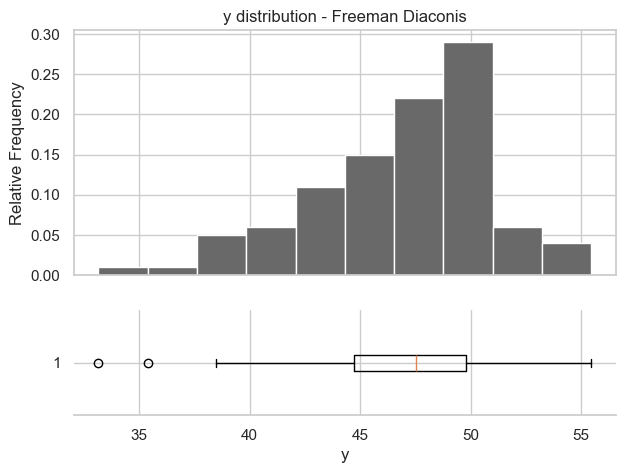

In [12]:
histogram_w_whiskers(df, "y", zoom=None)

While the coincidence of the mean and median suggest symmetry, the distribution is very skewed right.

Here is a set of histograms with fewer and more bins:

Freeman Diaconis for y: 11 bins


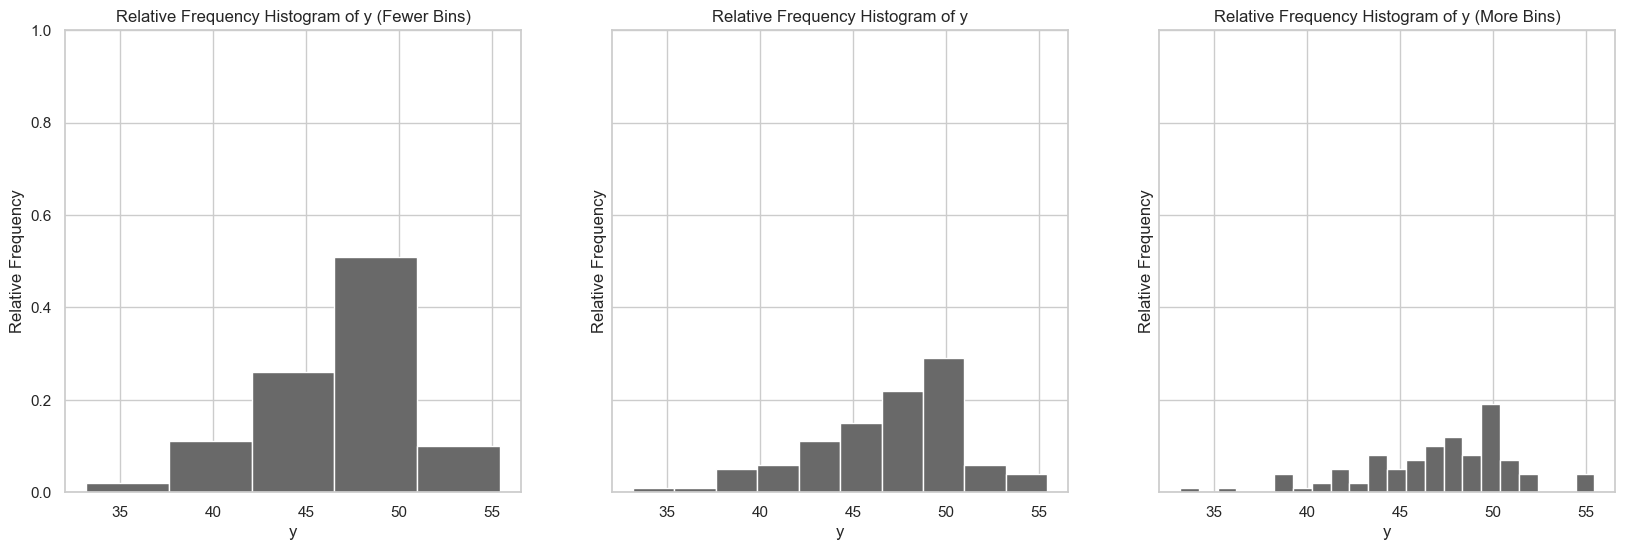

In [13]:
histogram_trio(df, "y", zoom=1.0)

While the overall pattern persists in the histogram with fewer bins,
The histogram with more bins shows that there might be some finer detail in the data.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>Don't forget your questions and notes when working with real data.</p>
</div>

Here are the descriptive statistics:

#### $x_1$

$x_1$ is a numerical variable.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>This is synthetic data so there's no actual domain knowledge or hypothesis to make. Those would go here if it were real data, right?</p>
</div>

Here are the descriptive statistics:

In [14]:
df.x1.describe()

count    100.000000
mean      48.621770
std        5.203988
min       33.519831
25%       45.926687
50%       49.466580
75%       51.802277
max       59.517414
Name: x1, dtype: float64

The mean is 48.6 with a standard deviation of 5.2.
The median is 49.5, which suggests a slight skew.
The difference between Q2 and Q1 is 49.5 - 46 $\approx$ 3.5.
The difference between Q3 and Q2 is 51.8 - 49.5 $\approx$ 2.3.
This suggests a skew as well.

Looking at the min and max, the min and Q1 are 12.4 units apart while the max and Q3 are 7.7 units apart.
This suggests a skew right as well.
This makes sense if we believe that $x_1$ and $y$ are related.

Here is the histogram:

Freeman Diaconis for x1: 11 bins


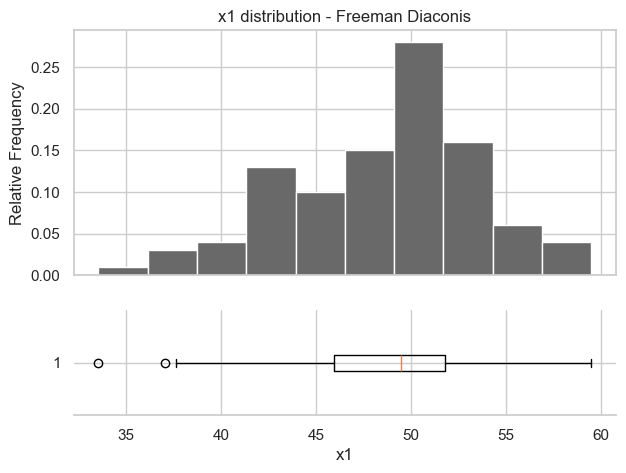

In [15]:
histogram_w_whiskers(df, "x1", zoom=None)

$x_1$ itself appears to be multi-modal with a peak around 43 and 50.
It's interesting that this same peak doesn't appear in $y$.
$x_1$, like $y$, is skewed right but there is something else going on.

Here are histograms with fewer and more bins:

Freeman Diaconis for x1: 11 bins


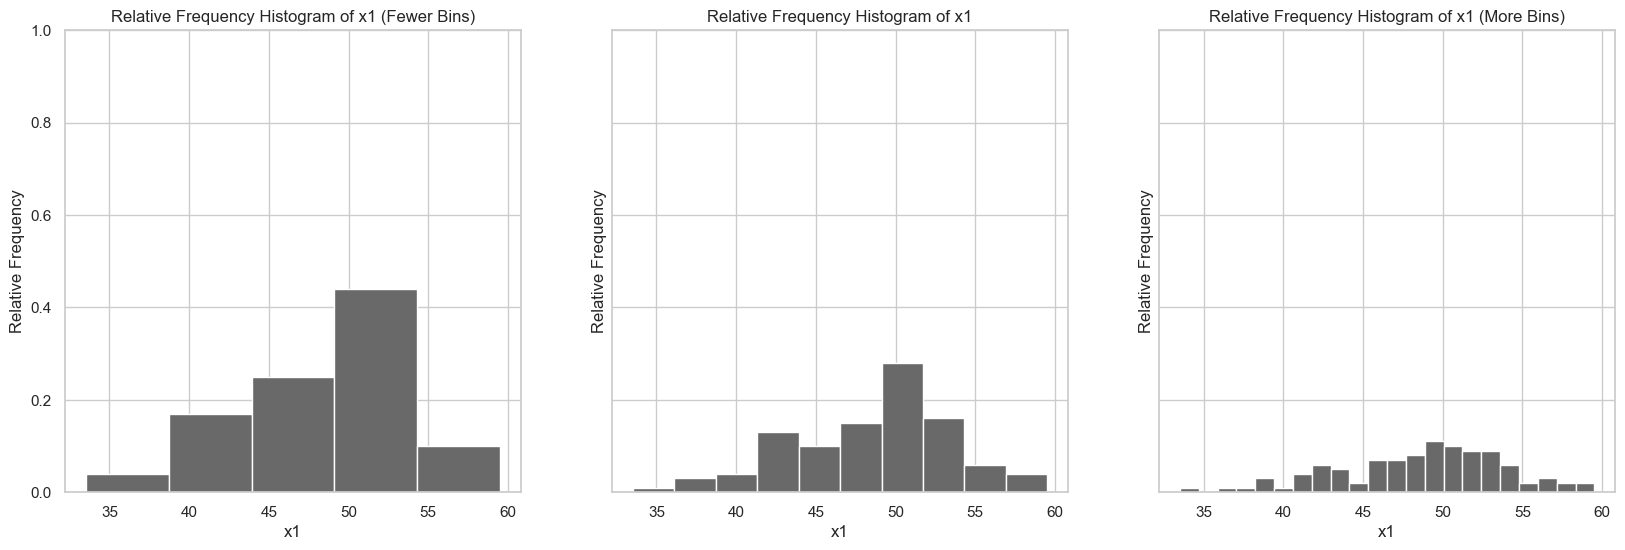

In [16]:
histogram_trio(df, "x1", zoom=1.0)

$y$ and $x_1$ have much more similar histograms with fewer bins than with the "optimal" number.
With more bins, we can see more detail in $x_1$.
This detail might explain the similar patterns in $y$.


<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>Don't forget your questions and notes when working with real data.</p>
</div>

#### $x_2$

$x_2$ is a categorical variable with values 0 and 1.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>This is synthetic data so there's no actual domain knowledge or hypothesis to make. Those would go here if it were real data, right?</p>
</div>

Here are the descriptive statistics:

In [17]:
df.x2.value_counts()

x2
1    61
0    39
Name: count, dtype: int64

Two thirds of the data have $x_2$, whereas the other third does not.
It's possible that $x_2$ explains the different patterns in both $y$ and $x_1$ as we know that $x_2$ influences both variables.


<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>Don't forget your questions and notes when working with real data.</p>
</div>

## Pairwise EDA

### $y$ v. $x_1$

We know from our domain knowledge that $x_1 - (+) \longrightarrow y$.
Let's see how strong that relationship is, based on correlation coefficients:

In [18]:
print("r   = ", stats.pearsonr(df.y, df.x1)[0])
print("rho = ", stats.spearmanr(df.y, df.x1)[0])

r   =  0.9319890664545462
rho =  0.9339573957395738


Both Pearson's correlation coefficient, $r$ = 0.93, and Spearman's, $\rho$ = 0.933, show a very strong correlation between $y$ and $x_1$.

Here is a scatter plot:

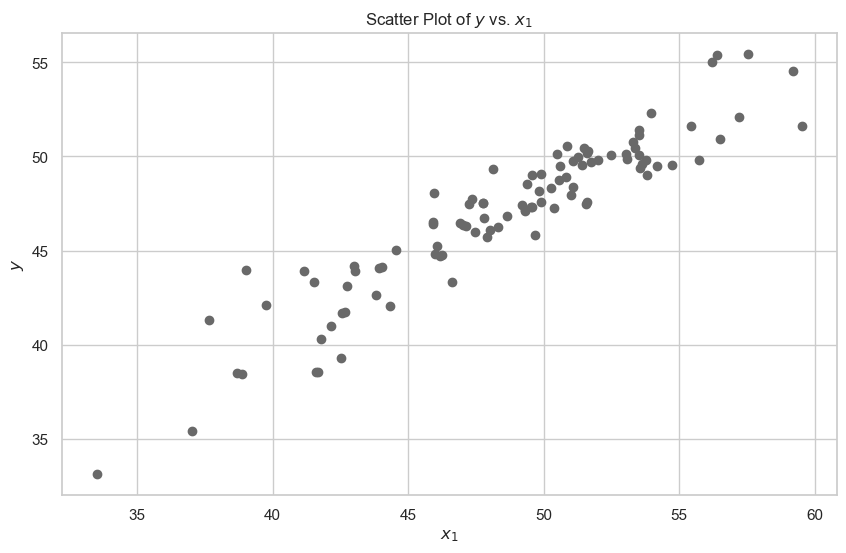

In [19]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter(df.x1, df.y, marker="o", color="dimgray")

axes.set_ylabel("$y$")
axes.set_xlabel("$x_1$")
axes.set_title("Scatter Plot of $y$ vs. $x_1$")

plt.show()
plt.close()

Although the plot shows an overall linear relationship between the variables, the relationship gets less tight at low and high values of $x_1$.

#### $y$ v. $x_2$

Based on domain knowledge, we believe that $x_2 - (+) \longrightarrow y$.
Therefore, we expect the mean of $y$ to be higher for $x_2=1$ than $x_2=0$.

In [20]:
describe_by_category(df, "y", "x2", transpose=True)

x2             0          1
count  39.000000  61.000000
mean   45.165771  48.157898
std     5.286994   2.623129
min    33.149453  41.286182
25%    41.731414  46.738819
50%    45.739733  48.722784
75%    48.415287  49.805879
max    55.466882  54.549418


The descriptive statistics show that the mean of $y$ where $x_2=1$ is 48.2 as compared to $x_2=0$, where the mean is 45.2, about three units less.

Here are histograms for $y$ for the different values of $x_2$:

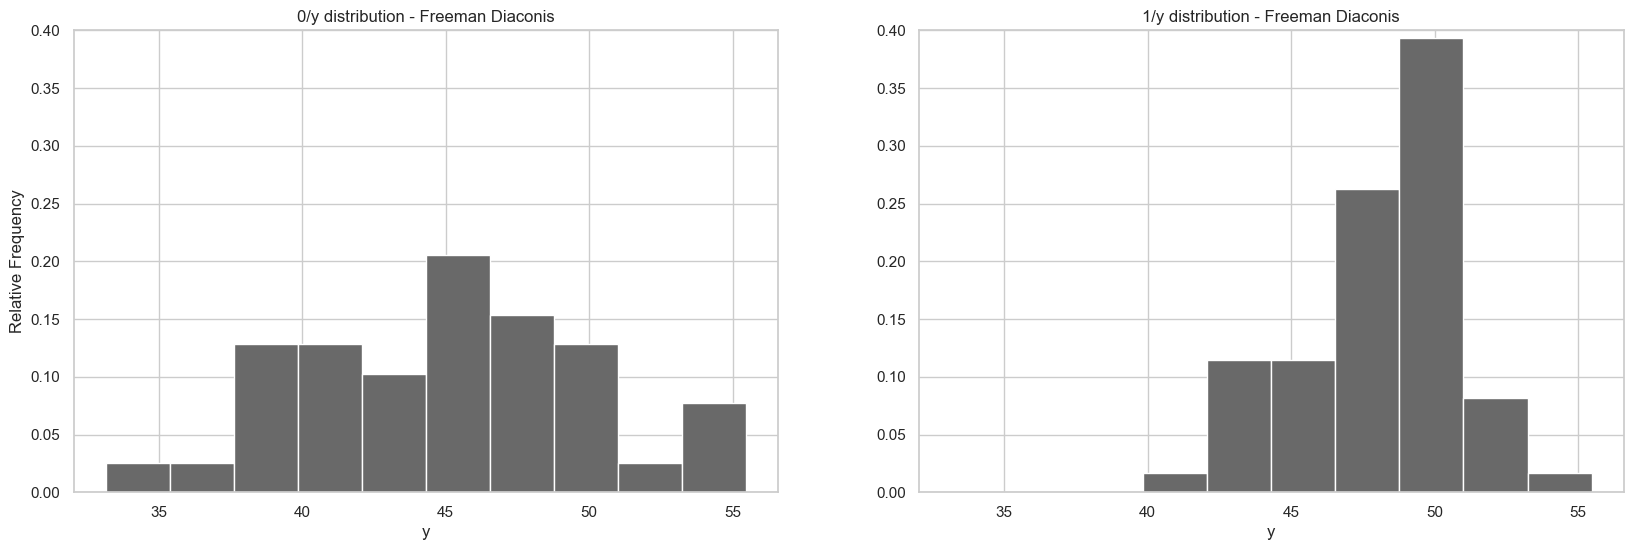

In [21]:
k, mn, mx = freeman_diaconis(df.y)
bins = np.linspace(mn, mx, num=k)

grouped = df.groupby("x2")

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)

observations = len(grouped["y"].get_group(0))
empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()

axes.hist(grouped["y"].get_group(0),bins=bins,color="dimgray", weights=empirical_weights)
axes.set_title("0/y distribution - Freeman Diaconis")
axes.set_xlabel("y")
axes.set_ylim((0,0.4))
axes.set_ylabel("Relative Frequency")

observations = len(grouped["y"].get_group(1))
empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()

axes = figure.add_subplot(1, 2, 2)
axes.hist(grouped["y"].get_group(1),bins=bins,color="dimgray", weights=empirical_weights)
axes.set_title("1/y distribution - Freeman Diaconis")
axes.set_xlabel("y")
axes.set_ylim((0,0.4))

plt.show()
plt.close()

There's an interesting pattern here.
When $x_2$=0, the variability of $y$ is much higher than if $x_2$=1.

#### $x_1$ v. $x_2$

Our domain knowledge also suggests that $x_1$ and $x_2$ are negatively related, $x_2 - (-) \longrightarrow x_1$.
This could have ramifications for any modeling choices we make later, depending on the model.

Here are the descriptive statistics by value of $x_2$:

In [22]:
describe_by_category(df, "x1", "x2", transpose=True)

x2             0          1
count  39.000000  61.000000
mean   46.698656  49.851302
std     5.461209   4.674884
min    33.519831  37.635428
25%    42.623067  47.356506
50%    46.620650  50.612176
75%    49.914319  53.306928
max    57.526509  59.517414


The results suggest our domain knowledge might be wrong or improperly specified.
When $x_2$ = 1, the mean of $x_1$ is higher (49.9) than when $x_2$=0, (46.7).
We can also see that the variability of $x_1$ is larger when $x_2$=1 (5.5 v. 4.7).

Here are the histograms by value of $x_2$:

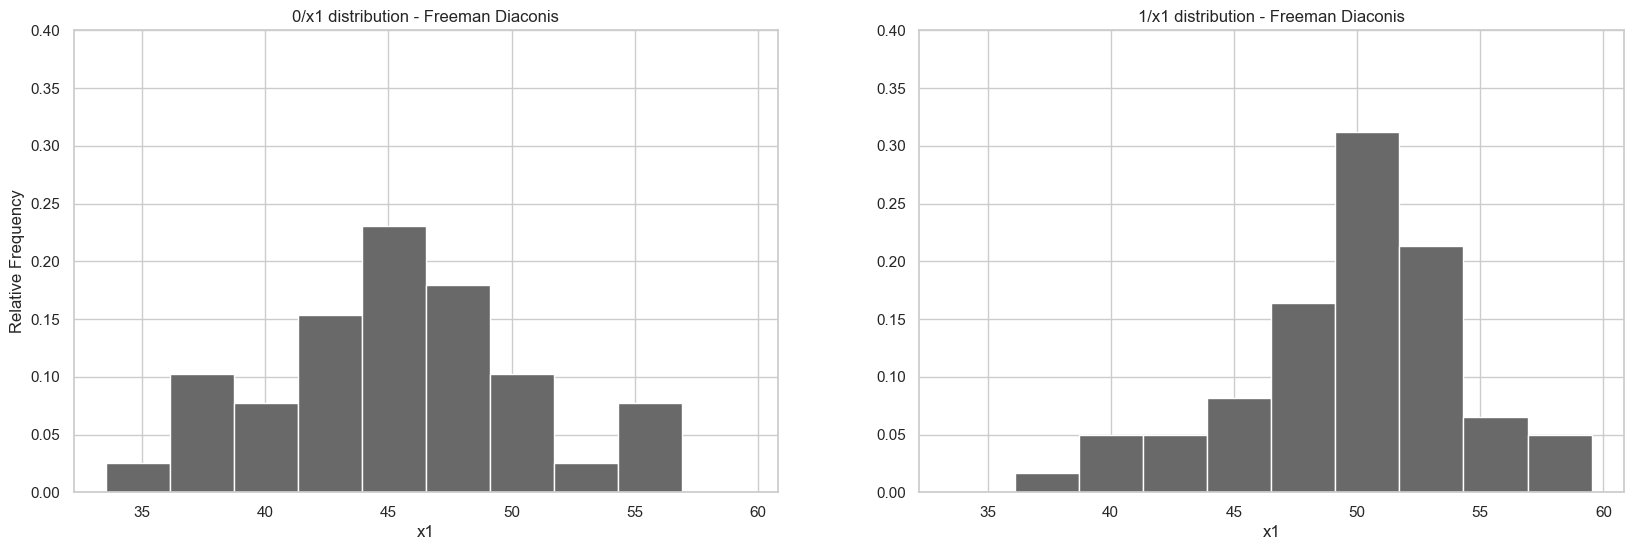

In [23]:
k, mn, mx = freeman_diaconis(df.x1)
bins = np.linspace(mn, mx, num=k)

grouped = df.groupby("x2")

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)

observations = len(grouped["x1"].get_group(0))
empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()

axes.hist(grouped["y"].get_group(0),bins=bins,color="dimgray", weights=empirical_weights)
axes.set_title("0/x1 distribution - Freeman Diaconis")
axes.set_xlabel("x1")
axes.set_ylim((0,0.4))
axes.set_ylabel("Relative Frequency")

observations = len(grouped["x1"].get_group(1))
empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()

axes = figure.add_subplot(1, 2, 2)
axes.hist(grouped["x1"].get_group(1),bins=bins,color="dimgray", weights=empirical_weights)
axes.set_title("1/x1 distribution - Freeman Diaconis")
axes.set_xlabel("x1")
axes.set_ylim((0,0.4))

plt.show()
plt.close()

We see the same pattern for $x_1$, given $x_2$, that we saw for $y$.
When $x_2$ is 0, the variability of $x_1$ is larger than when when $x_2$ is 1.
We can also see that the histogram has a higher peak when $x_2$ is 1.
This could be an explanation for the patterns we saw in the detailed histograms for $y$ and $x_1$.

After conducting her EDA, she decided to create a Baseline or Null model for $y$.
Based on the use case, she noted that over estimates and under estimates should be treated the same and large errors should be penalized more than small errors.

**1. What function did she use to measure loss?**

She would use the Mean Square Error (MSE) here as her loss function, since the mean, $\bar{y}$ would be the best predictor to minimize the error.

**2. What constant/estimator minimizes that loss function?**

The mean of $y$, $\bar{y}$ is the estimator which minimizes the Mean Square Error loss function.

**3. Re-create her Baseline model, along with predictive/error bounds**

The baseline model uses the mean, $\bar{y}$ as the constant predictor.

In [24]:
y_bar = np.mean(df['y'])
y_bar

46.99096845797806

Our mean, $\bar{y}$, is 46.99, which becomes our constant prediction value.

In our EDA, we can see that $y$ doesn't appear to be roughly symmetric, and so to create our error bounds, we can use Chebyshev's Inequality. We can say that 75% of our data falls within $\pm$ 2 standard deviations from the mean.

In [25]:
y_std = np.std(df['y'])
lower = y_bar - (2 * y_std)
upper = y_bar + (2 * y_std)
print(f'({lower}, {upper})')

(38.77385565653742, 55.208081259418705)


So we know that 75% of our data falls between 38.77 and 55.21 

In [26]:
import models
from IPython.display import display, Latex

**4. Model 1**

Now you are going to help her build a linear regression for $y$.

Build the model "y ~ x1" including credible intervals.
Interpret all parameters including $\sigma$ and $R^2$, where appropriate compare and contrast with the Null model.
What interpretation of the coefficients did you use?

In [27]:
results = models.linear_regression('y ~ x1', df)

models.simple_describe_lr(results)

Coefficients</strong,,Value</strong
,$\beta_{0}$,11.03
x1,$\beta_{1}$,0.74
,,
Metrics</strong,Value</strong,
$\sigma$,1.50,
$R^2$,0.87,


Our intercept, $\beta_{0}$ is 11.03 and our slope, $\beta_{1}$ is 0.74. We can interpret $\beta_{1}$ as the expected difference in _y_ between say _x1_ = 45 and _x1_ = 46, which in this case is 0.74. The intercept we will not worry about, as it doesn't seem relevant for now.

Our $\sigma$ aka standard deviation is 1.50 and our $R^2$ is 0.87, which means our model explains about 87% of the variability in _y_, which is pretty good. 

Our model becomes $\hat{y} = 11.03 + 0.74 * x1$

Now we can find credible intervals for these coefficients by bootstrapping using this model, in order to find posterior distributions:

In [28]:
results_ci = models.bootstrap_linear_regression('y ~ x1', df)

models.describe_bootstrap_lr(results_ci)

,,,95% BCI</strong,
Coefficients</strong,,Mean</strong,Lo</strong,Hi</strong
,$\beta_{0}$,11.03,6.56,14.92
x1,$\beta_{1}$,0.74,0.66,0.83
,,,,
Metrics</strong,Mean</strong,Lo</strong,Hi</strong,
$\sigma$,1.50,1.26,1.65,
$R^2$,0.87,0.83,0.91,


Here we can see that we have 95% probability that our $\beta_{0}$ is in the range $(7.57, 13.70)$. Similarly, $\beta_{1}$ will have 95% chance to be between 0.69 and 0.81, and the same can be said for our metrics as well.

Comparing to the null model, remember that our error bounds for 75% of our data was 38.77 to 55.21. Note this range would not be too different had we chosen to call _y_ summetric, and use the standard $\pm$ 1.96 for our 95% error bounds. Our regression model has a much tighter range than the baseline model.

**5. Write out the regression equation**

Our equation for this model is $\hat{y} = \hat{\beta_{0}} + \hat{\beta_{1}} * x1$

With our estimated values for $\beta_{0} = 11.03$ and $\beta_{1} = 0.74$, we can say that our regression equation now becomes $\hat{y} = 11.03 + 0.74 * x1$

**6. Plot y v. x1 and the linear regression line**

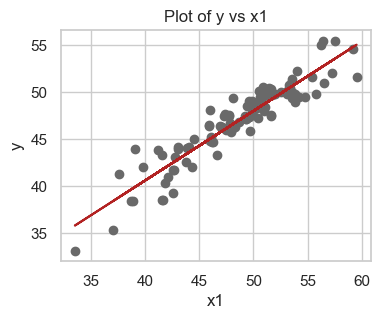

In [29]:
figure = plt.figure(figsize=(4,3))

axes = figure.add_subplot(1,1,1)
axes.scatter(df['x1'], df['y'], color='dimgray')

beta = results['coefficients']
axes.plot(df['x1'], [beta[0] + beta[1] * x1 for x1 in df['x1']], '-', color='firebrick')

axes.set_ylabel('y')
axes.set_xlabel('x1')
axes.set_title('Plot of y vs x1')

plt.show()
plt.close()

Pretty good regression model as we saw from our $R^2$ value, we note a few fringe cases mostly towards the lower values of x1.

**7. Model 2**

Build the model "y ~ x1 + x2 + x1:x2" including credible intervals. 
Interpret all parameters including $\sigma$ and $R^2$, where appropriate compare and contrast with the Null model.
What interpretation of the coefficients did you use?

We go straight to looking at the bootstrap here, since the output will also include the coeffcients for our model.

In [30]:
results_ci_2 = models.bootstrap_linear_regression('y ~ x1 + x2 + x1:x2', df)

models.describe_bootstrap_lr(results_ci_2)

,,,95% BCI</strong,
Coefficients</strong,,Mean</strong,Lo</strong,Hi</strong
,$\beta_{0}$,0.84,-0.80,3.36
x1,$\beta_{1}$,0.95,0.90,0.99
x2,$\beta_{2}$,21.38,18.33,25.19
x1:x2,$\beta_{3}$,-0.43,-0.50,-0.37
,,,,
Metrics</strong,Mean</strong,Lo</strong,Hi</strong,
$\sigma$,1.01,0.87,1.10,
$R^2$,0.94,0.92,0.96,


 We technically have two different models here since _x2_ is binary categorical. When $x2 = 0$, our model becomes $\hat{y} = \beta_{0} + \beta{1} * x1$, and when $x2 = 1$, we have $\hat{y} = \beta_{0} + \beta_{1} * x1 + \beta_{2} + \beta_{3} * x1$ =  <br> $\hat{y} = (\beta_{0} + \beta_{2}) + (\beta_{1} + \beta_{3}) * x1$

Then our equations become <br><br>

$\hat{y} = 0.84 + 0.95 * x1$ and <br><br>
$\hat{y} = (0.84 + 21.38) + (0.84 -0.43) * x1 = 22.22 + 0.41 * x1$ 

For x2 = 0, our model starts low and increases at a rate of 1 to 1 for each point in x1. For our model where x2 = 1, we see that our base value starts much higher and increases only about half of our first model.

We can also look at our 4 coefficients, and note that $\beta_{2}$ has a relatively large mean estimation, at 21.38, while the other 3 coefficients $\beta_{0}$, $\beta_{1}$, and $\beta_{3}$ are much closer in values of 0.84, 0.95, and -0.43, respectively.

Our standard deviation is 1.01, and our $R^2$ can explain about 94% of the variability in our data, which seems good. Remember that adding coefficient terms to a model generally increases our $R^2$ value, so we could posssibly get away with removing some of these coefficients (but that's getting more into model adequacy and validation).

Compared to the baseline model, it seems that $\beta_{2}$ will have the largest effect on the slope, while our interaction terms has a slight negative effect.

**8. Write out the regression equations**

Again we have two different models here since _x2_ is binary categorical. When $x2 = 0$, our model becomes $\hat{y} = \beta_{0} + \beta{1} * x1$, and when $x2 = 1$, we have $\hat{y} = \beta_{0} + \beta_{1} * x1 + \beta_{2} + \beta_{3} * x1$ =  <br> $\hat{y} = (\beta_{0} + \beta_{2}) + (\beta_{1} + \beta_{3}) * x1$

Then our equations become <br><br>

$\hat{y} = 0.84 + 0.95 * x1$ and <br><br>
$\hat{y} = (0.84 + 21.38) + (0.84 -0.43) * x1 = 22.22 + 0.41 * x1$ 

**9. Plot y v. x1, x2 and the regression lines**

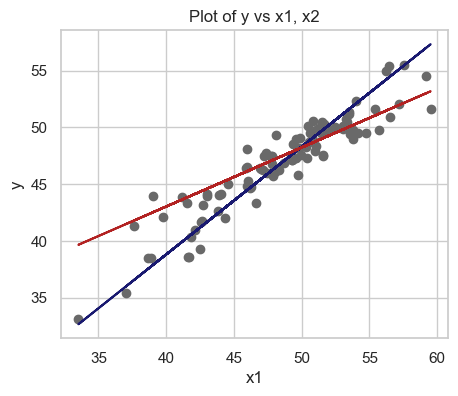

In [31]:
figure = plt.figure(figsize=(5,4))

axes = figure.add_subplot(1,1,1)
axes.scatter(df['x1'], df['y'], color='dimgray')

beta = results_ci_2['coefficients']
axes.plot(df['x1'], [beta[0] + beta[1] * x1 for x1 in df['x1']], '-', color='midnightblue')
axes.plot(df['x1'], [(beta[0] + beta[2]) + (beta[1] + beta[3]) * x1 for
                        x1 in df['x1']], '-', color='firebrick')

axes.set_ylabel('y')
axes.set_xlabel('x1')
axes.set_title('Plot of y vs x1, x2')

plt.show()
plt.close()

Our plot is as expected, with the blue line being x2 = 0 in the model, and red line with x2 = 1. Our blue line starts lower and increases faster, as mentioned previously when we looked at the model coefficients.

### Side Quest

**10. Model 3**

Sam is interested in the relationship between $y$ and $x_2$.
Build the model "y ~ x2" including credible intervals, interpret all parameters including $\sigma$ and $R^2$, where appropriate compare and contrast with the EDA on $y$ v. $x_2$.
How are the estimated parameters related to the descriptive statistics?

In [32]:
results_ci = models.bootstrap_linear_regression('y ~ x2', df)

models.describe_bootstrap_lr(results_ci)

,,,95% BCI</strong,
Coefficients</strong,,Mean</strong,Lo</strong,Hi</strong
,$\beta_{0}$,45.17,43.71,46.58
x2,$\beta_{1}$,2.99,1.50,4.52
,,,,
Metrics</strong,Mean</strong,Lo</strong,Hi</strong,
$\sigma$,3.88,3.10,4.40,
$R^2$,0.13,0.03,0.28,


We see a mean for the intercept at 45.17, and a value of 2.99 for $\beta_{1}$. Our $R^2$ is only 0.13, and standard deviation is 3.88, relatively high considering the mean of our slope.

We saw that the mean for _y_ was slightly lower given x2 = 0 compared to x2 = 1. The estimated parameters relate to the descriptive statistics by descrbing the change in values of the slope between x2 = 0 and x2 = 1.

**11. Non-Parametric Bootstrap**

Estimate the posterior distribution of $y$ for the groups $x_2=0$ and $x_2=1$ as we did in Module 7.
Estimate the 95% credible interval for the difference.
Compare and constrast your results to Model 3 and Model 2.

In [33]:
def bootstrap_sample( data, f, n=1000):
    result = []
    m = len( data)
    for _ in range( n):
        sample = np.random.choice( data, len(data), replace=True)
        r = f( sample)
        result.append( r)
    return np.array( result)

For a binary feature, we know performing regression is equivalent to calculating the mean for each group, so we have two values for $\bar{y}$, one when x2 = 0 and another when x2 = 1.

In [34]:
grouped = df.groupby('x2')
grouped['y'].describe()

,count,mean,std,min,25%,50%,75%,max
x2,,,,,,,,
0,39.0,45.165771,5.286994,33.149453,41.731414,45.739733,48.415287,55.466882
1,61.0,48.157898,2.623129,41.286182,46.738819,48.722784,49.805879,54.549418


In [35]:
y1 = df[df['x2'] == 0]['y']
y2 = df[df['x2'] == 1]['y']

In [36]:
posterior_zero = bootstrap_sample(y1, np.mean, 1000)
posterior_one = bootstrap_sample(y2, np.mean, 1000)
difference = posterior_zero - posterior_one
posteriors = [posterior_zero, posterior_one, difference]

We can plot these posterior distributions:

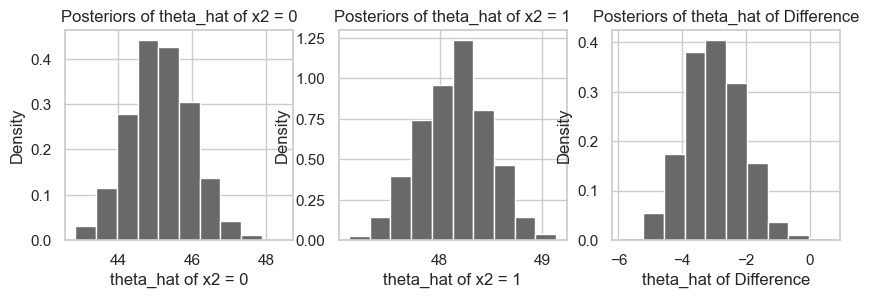

In [37]:
figure = plt.figure(figsize=(10, 6)) # first element is width, second is height.
titles = ['x2 = 0', 'x2 = 1', 'Difference']

for i,x in enumerate(posteriors):
    axes = figure.add_subplot(2, 3, i + 1)
    
    axes.hist(x, density=True, color='dimgray')
    axes.set_ylabel( "Density")
    axes.set_xlabel( f"theta_hat of {titles[i]}")
    axes.set_title( f"Posteriors of theta_hat of {titles[i]}")

plt.show()
plt.close()

We see the posterior of x2 = 1 slightly higher than when x2 = 0, similar to what we saw in our pairwise EDA. The difference is centered around -3, which makes sense since we said x2 = 1 was about 3 points higher than x2 = 0.

The 95% credible interval for the difference is:

In [38]:
stats.mstats.mquantiles(difference, [0.025, 0.975])

array([-4.70151669, -1.21988655])

We have 95% chance that our difference will be between -4.70 to -1.22, for the difference in x2 = 0 minus x2 = 1.

Model 2 includes the x1 term, and so model 2 has a higher $R^2$ value. Our model 3 intercept starts much higher, and has a higher standard deviation compared to model 2. I would think model 2 would be preferred in this case.